In [15]:
# Necessary Packages 

import numpy as np
import pandas as pd
import graphviz

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor , export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# Loading dataset

init_data = pd.read_csv('/home/igel/Downloads/database.csv')
init_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# List of features in initial dataset

list(init_data)
print(init_data.shape)

(23412, 21)


In [4]:
# Data cleaning 

init_data['Year']  = init_data['Date'].apply(lambda x: str(x)[6:])
init_data['Day']   = init_data['Date'].apply(lambda x: str(x)[3:5])
init_data['Month'] = init_data['Date'].apply(lambda x: str(x)[:2])
init_data['Hour']  = init_data['Time'].apply(lambda x: str(x)[:2])
init_data['SinLatitude']  = init_data['Latitude'].apply(lambda x: np.sin(x))
init_data['SinLongitude'] = init_data['Longitude'].apply(lambda x: np.sin(x))

In [5]:
# Feature selecting

count_nan = len(init_data) - init_data.count()
print(count_nan)

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Year                              0
Day                               0
Month                             0
Hour                              0
SinLatitude                       0
SinLongitude                      0
dtype: int64


In [6]:
# Drop not necessary (imho) features

drop_features = ['Depth Error','Depth Seismic Stations', 'Magnitude Type', 'Magnitude Error', 
                "Magnitude Seismic Stations", 'Azimuthal Gap', 'Horizontal Distance', "Horizontal Error",
                'Root Mean Square', 'ID', "Magnitude Source", 'Magnitude', 'Date',
                'Latitude','Longitude']

data = init_data.drop(drop_features, axis = 1)
target = init_data['Magnitude']

In [7]:
# Converting to categorical features 

for col in data.columns:
    if data[col].dtype=='object':
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[col].values))
        data[col] = lbl.transform(list(data[col].values))


Time
Type
Source
Location Source
Status
Year
Day
Month
Hour


In [8]:
data.head()

,Time,Type,Depth,Source,Location Source,Status,Year,Day,Month,Hour,SinLatitude,SinLongitude
0,11784,0,131.6,4,20,0,0,1,0,13,0.386141,0.892446
1,9865,0,80.0,4,20,0,0,3,0,11,0.957611,0.993105
2,15447,0,20.0,4,20,0,0,4,0,18,-0.987442,0.926275
3,16087,0,15.0,4,20,0,0,7,0,18,-0.576354,0.999988
4,11611,0,15.0,4,20,0,0,8,0,13,-0.587827,0.691305


In [9]:
# Split data into test and train

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3)

In [10]:
# Regression !

clf = DecisionTreeRegressor(max_depth= 5)
clf = clf.fit(train_data, train_target)
y_predicted = clf.predict(test_data)

In [11]:
y_predicted

array([5.95522107, 5.89723077, 5.79711027, ..., 5.82385592, 5.92920354,
       5.82385592])

In [12]:
# Mean squared error

mean_squared_error(test_target, y_predicted)

0.17276970971858074

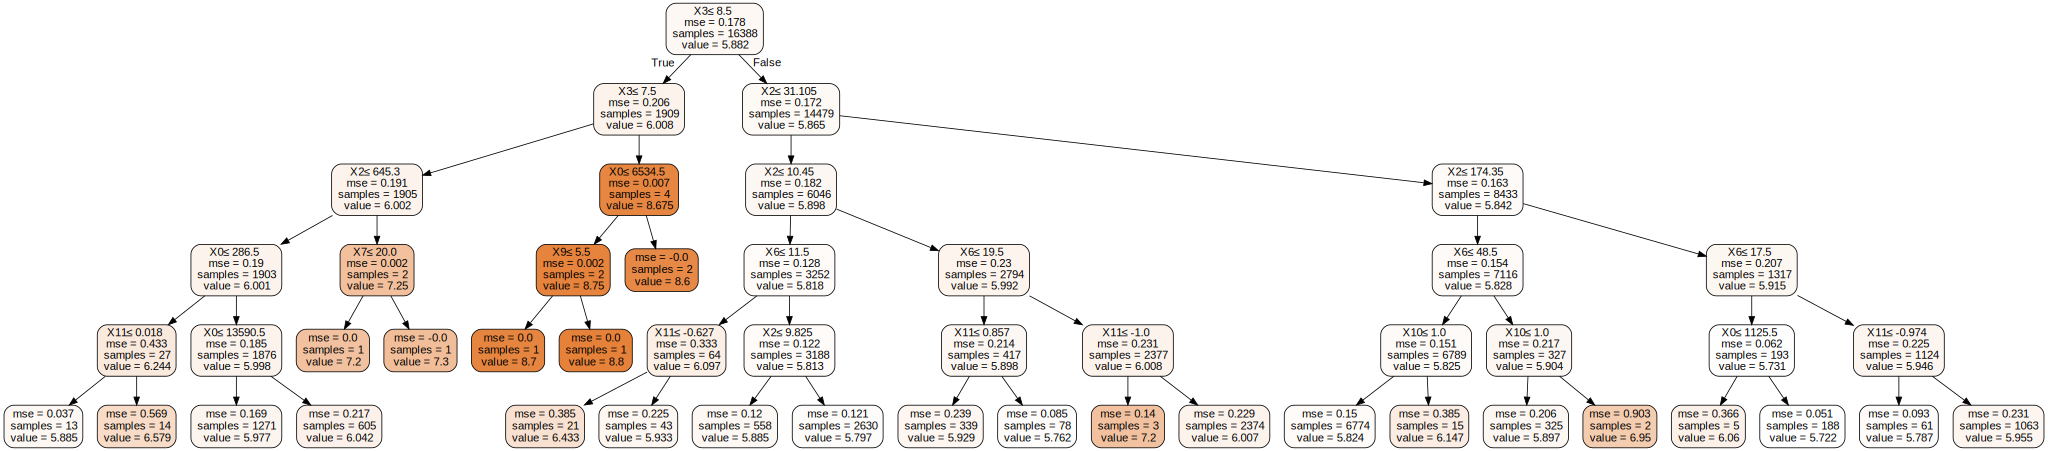

In [16]:
# Vizualization

dot_data = export_graphviz(clf, out_file=None, 
                          
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Data") 